# **Lab 2.1 Image Enhancement with Math Operation**
This lab consists of two main subparts: Image Pixel Adjustment using Linear Equations and Gamma Equations.

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

Read an image using OpenCV (Use your own image).

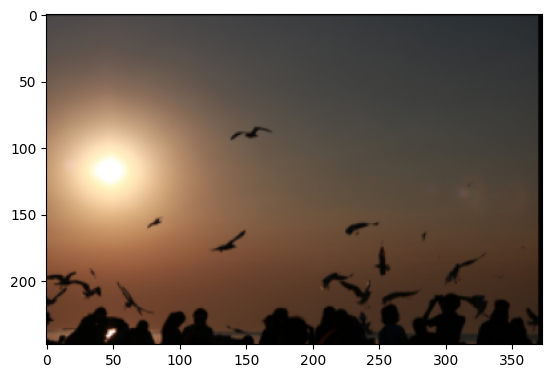

In [22]:
### START CODE HERE ###
img = cv2.imread("/content/image.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
### END CODE HERE ###

## **Image Pixel Adjustment**

### Using Linear Equation
$$I_{new} = I \cdot a + b$$

Please perform at ***least 20 iterations*** with varying values of $a$ and $b$.
Assign the result of each iteration to an array.<br/>

In [23]:
### Image Pixel Adjustment
### Image-Enhancement-with-Math-Operation
# (Using Linear Equation)
# Image_New = (Image*a) + b

### START CODE HERE ###
a = 0
b = 0
lin_result = []

# import image
img = cv2.imread("/content/image.png")
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image_New = (Image*a) + b
def adjustment_image(image, a, b):
    new_image = (((image)*a)) + b
    new_image = np.clip(new_image, 0, 255)
    return new_image.astype(np.uint8)

# set alpha and beta
# np.linspace : (start, stop, length of array)
# step = (stop-start)/(len(array)-1)
a = np.linspace(0.5, 1.5, 2)
b = np.linspace(-50, 50, 10)

for alpha in a:
  for beta in b :
    new_image = adjustment_image(image, alpha, beta)
    lin_result.append(new_image)
    print(f"alpha : {alpha} | beta {beta}")
  print("-"*30)
### END CODE HERE

alpha : 0.5 | beta -50.0
alpha : 0.5 | beta -38.888888888888886
alpha : 0.5 | beta -27.77777777777778
alpha : 0.5 | beta -16.66666666666667
alpha : 0.5 | beta -5.555555555555557
alpha : 0.5 | beta 5.555555555555557
alpha : 0.5 | beta 16.666666666666657
alpha : 0.5 | beta 27.77777777777777
alpha : 0.5 | beta 38.888888888888886
alpha : 0.5 | beta 50.0
------------------------------
alpha : 1.5 | beta -50.0
alpha : 1.5 | beta -38.888888888888886
alpha : 1.5 | beta -27.77777777777778
alpha : 1.5 | beta -16.66666666666667
alpha : 1.5 | beta -5.555555555555557
alpha : 1.5 | beta 5.555555555555557
alpha : 1.5 | beta 16.666666666666657
alpha : 1.5 | beta 27.77777777777777
alpha : 1.5 | beta 38.888888888888886
alpha : 1.5 | beta 50.0
------------------------------


Plot the images in a grid as shown below. Using `ImageGrid`.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical
- The reference output used 40 iterations.

![image-2.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/1-1.png?raw=true)
</details>


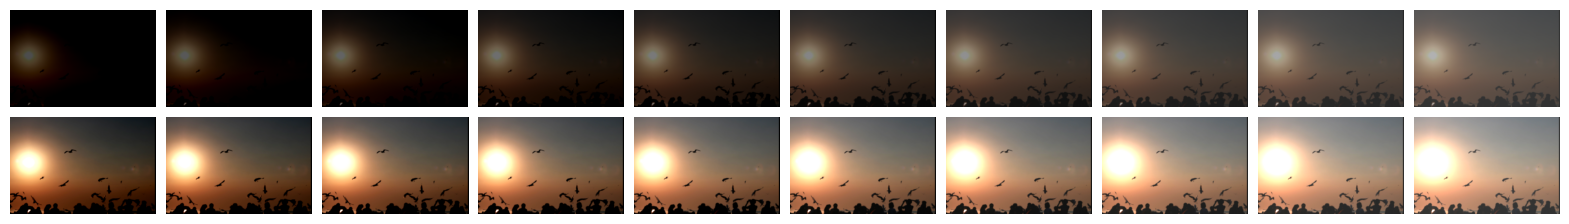

In [24]:
### START CODE HERE ###
fig = plt.figure(figsize=(20, 15))
# grid : (creates 2x10 grid of Axes and padding between Axes in inch)
grid = ImageGrid(fig, 111, nrows_ncols=(2, 10), axes_pad=0.1)

for ax, im in zip(grid, lin_result):
    ax.imshow(im)
    ax.axis('off')

plt.show()
### END CODE HERE ###

If you code work properly, the cell below should run without error.

In [25]:
assert len(lin_result) >= 20, f"Expected more than or equal 20 iterations but got {len(lin_result)}"
for idx, result in enumerate(lin_result):
    assert result.shape == img.shape, f"Shape mismatch at index {idx}. Expected {img.shape} but got {result.shape}"
    assert result.dtype == np.uint8, f"Data type mismatch at index {idx}. Expected uint8 but got {result.dtype}"
    assert np.all((result >= 0) & (result <= 255)), f"Pixel value out of bounds at index {idx}"

Save the array of images to a video. Please complete the function below.

In [26]:
### START CODE HERE ###
def write_images_to_video(image_array, output_file, frame_rate=30):
    # width * height
    size = (image_array[0].shape[1], image_array[0].shape[0])

    # video encoding
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_file, fourcc, frame_rate, size)

    for image in image_array:
      img_cv = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
      out.write(img_cv)
    out.release()

# ### END CODE HERE ###

Use `write_images_to_video()` and save the result.

In [27]:
# create output folder
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

# set output file path
output_file = os.path.join(output_folder, "output_linear.mp4")

# pass frames_img_addition and output file path to function
write_images_to_video(lin_result, output_file, frame_rate=10)

Now use `matplotlib.animation` to display the animation from the images array.

In [28]:
### START CODE HERE ###
%%capture
fig = plt.figure()
vdos = []
for result in lin_result:
  vdo = [plt.imshow(result, animated=True)]
  vdos.append(vdo)
ani = animation.ArtistAnimation(fig, vdos, interval=1000/15, blit=True, repeat_delay=1000)
plt.axis('off')
### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![linear.gif](![<attachment:linear (2).gif>](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/linear.gif?raw=true))

</details>

In [29]:
display(HTML(ani.to_jshtml()))

Output hidden; open in https://colab.research.google.com to view.

### Gamma Equation
$$I_{new} = I^{\gamma} \cdot a + b$$

Where $a$ is 1 and $b$ is 0.
Please perform ***at least 20 iterations*** for 0 < $\gamma$ < 2 and another ***at least 20 iterations*** for $\gamma$ > 1
Assign the result of each iteration to an array.<br/>


In [30]:
### Image Pixel Adjustment
### Image-Enhancement-with-Math-Operation
# (Using Gamma Equation)
# Image_New = ((Image**gamma)*a) + b

### START CODE HERE ###
a = 1
b = 0
gamma = 0.1
gam_result = []

# (0 < gamma < 2) and (gamma > 1)
gamma_a = np.linspace(0.1, 1.9, 10)
gamma_b = np.linspace(1.1, 3, 10)
gamma_t = np.sort(np.concatenate([gamma_a, gamma_b]))
# print(gamma_t.shape)

def adjustment_gamma_image(image, a, b, gamma):
    # normalized image (0-1)
    new_image = (((image / 255) ** gamma) * 255 * a) + b
    new_image = np.clip(new_image, 0, 255)
    return new_image.astype(np.uint8)

for gamma in gamma_t:
  new_image = adjustment_gamma_image(image, a, b, gamma)
  gam_result.append(new_image)
  # print(gamma)

### END CODE HERE ###

Plot the images in a grid as shown below. Using `ImageGrid`.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/1-2.png?raw=true)
</details>

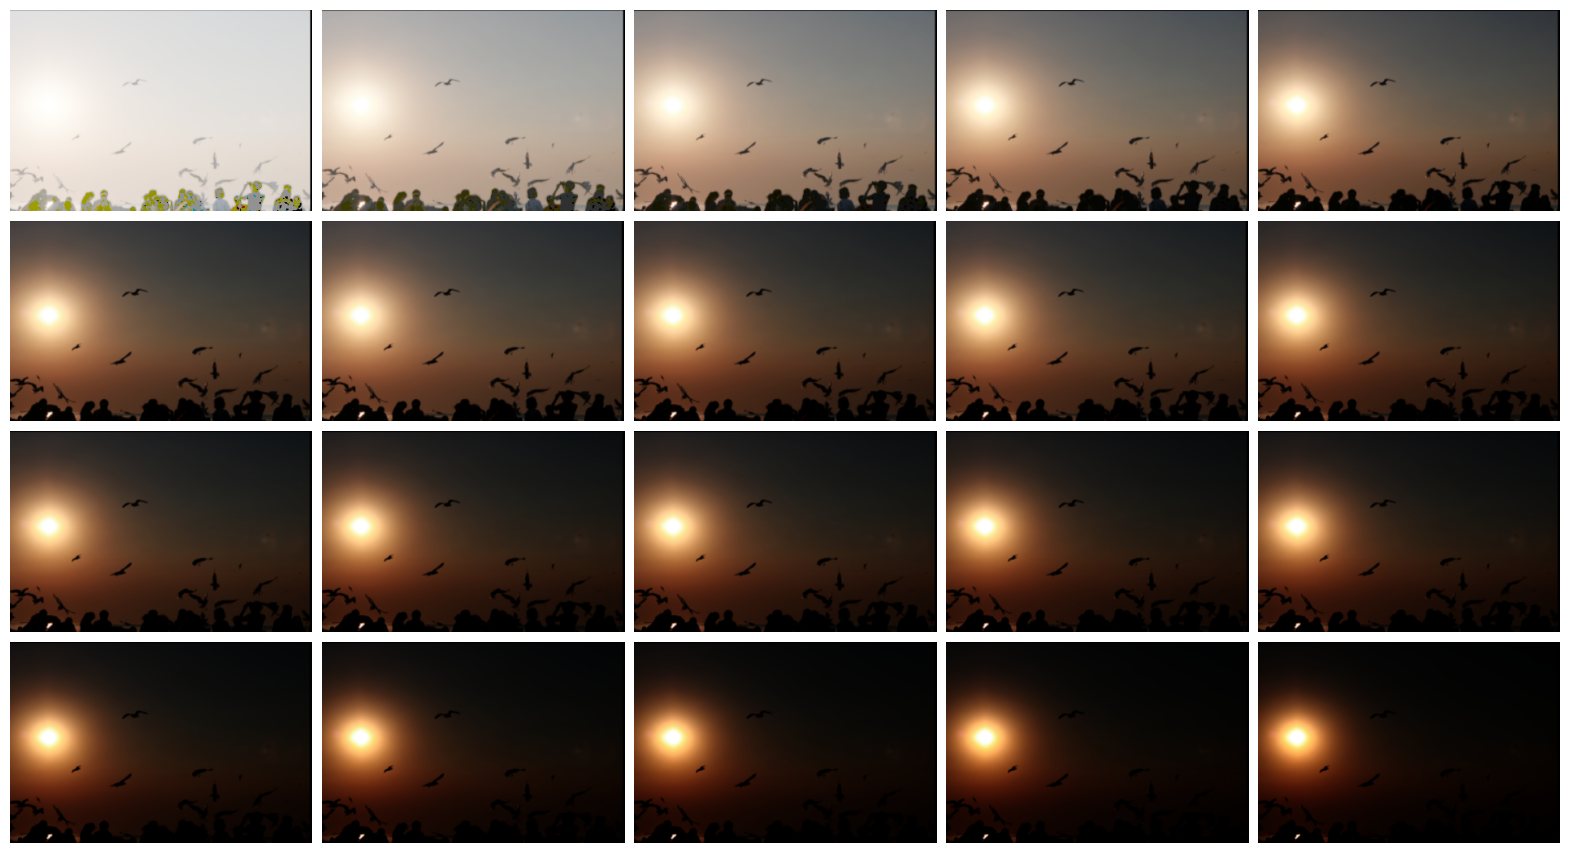

In [31]:
### START CODE HERE ###
fig = plt.figure(figsize=(20, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 5), axes_pad=0.1)
for ax, im in zip(grid, gam_result):
    ax.imshow(im)
    ax.axis('off')

plt.show()
### END CODE HERE ###

In [32]:
assert len(gam_result) == 20, f"Expected {20} iterations but got {len(gam_result)}"
for idx, result in enumerate(gam_result):
    assert result.shape == img.shape, f"Shape mismatch at index {idx}. Expected {img.shape} but got {result.shape}"
    assert result.dtype == np.uint8, f"Data type mismatch at index {idx}. Expected uint8 but got {result.dtype}"
    assert np.all((result >= 0) & (result <= 255)), f"Pixel value out of bounds at index {idx}"

Use `write_images_to_video()` and save the result.

In [33]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_gamma.mp4")
write_images_to_video(gam_result,output_file, 10)

Now use `matplotlib.animation` to display the animation from the images array.

In [34]:
%%capture
### START CODE HERE ###
fig = plt.figure()
vdos = []
for result in gam_result:
  vdo = [plt.imshow(result, animated=True)]
  vdos.append(vdo)
ani = animation.ArtistAnimation(fig, vdos, interval=1000/15, blit=True, repeat_delay=1000)
plt.axis('off')
### END CODE HERE ###

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![gamma2.gif](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/gamma.gif?raw=true)

</details>

In [35]:
display(HTML(ani.to_jshtml()))

Output hidden; open in https://colab.research.google.com to view.

---

## **Questions**
1. If an image having over brightness or saturation, what would be possible solutions to enhance the image. (Gamma Equation(slope > 1))
2. How can we make an image reverse intensity (black-to-white, white-to-black)? Explain the process (Linear operation (negative slope (slope < 0)))